# **EMDAT 災害データを用いた関数・ループによる可視化分析**

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("emdat.csv")

# 実際の列名に合わせて変更してください
df = df[["Country", "Disaster Type", "Start Year", "Total Deaths"]].dropna()

# Year 列として名前を統一
df = df.rename(columns={"Start Year": "Year"})


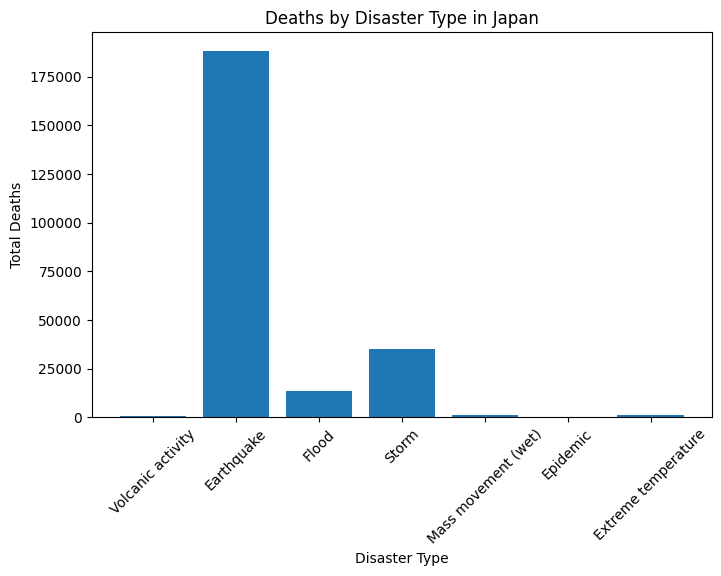

In [10]:
def visualize_deaths_by_country(country):
    """
    指定した国の災害タイプごとの死亡者数を棒グラフで可視化
    """
    data = df[df["Country"] == country]

    # 災害タイプごとに合計（ループ利用例）
    deaths = {}
    for d_type in data["Disaster Type"].unique():
        deaths[d_type] = data[data["Disaster Type"] == d_type]["Total Deaths"].sum()

    # グラフ化
    plt.figure(figsize=(8,5))
    plt.bar(deaths.keys(), deaths.values())
    plt.title(f"Deaths by Disaster Type in {country}")
    plt.xlabel("Disaster Type")
    plt.ylabel("Total Deaths")
    plt.xticks(rotation=45)
    plt.show()

# 例
visualize_deaths_by_country("Japan")


この棒グラフは、日本における災害タイプ別の死亡者数を示しています。バーの高さを比較することで、どの災害がより大きな被害をもたらしたかを一目で確認できます。

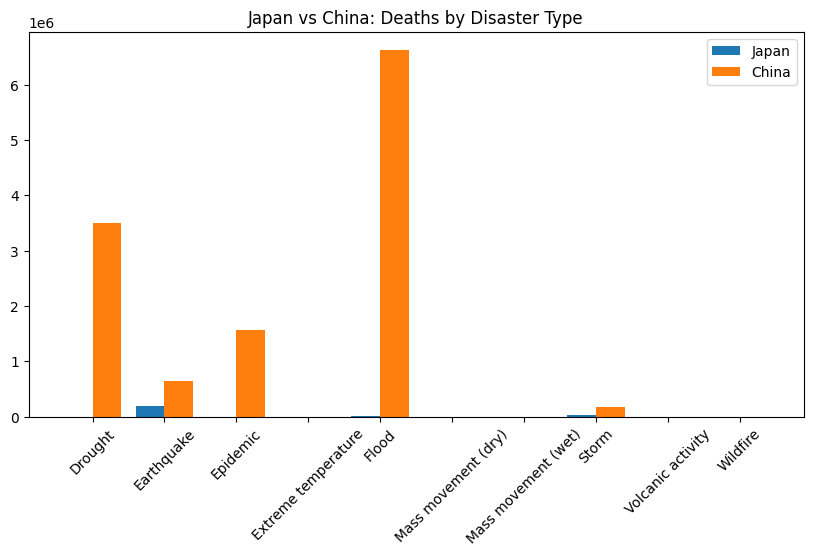

In [11]:
def compare_two_countries(country1, country2):
    """
    2つの国の災害タイプごとの死亡者数を比較する棒グラフ
    """
    df1 = df[df["Country"] == country1]
    df2 = df[df["Country"] == country2]

    disaster_types = sorted(set(df1["Disaster Type"].unique()) | set(df2["Disaster Type"].unique()))

    deaths1 = []
    deaths2 = []

    # ループで災害タイプを順に集計
    for d_type in disaster_types:
        deaths1.append(df1[df1["Disaster Type"] == d_type]["Total Deaths"].sum())
        deaths2.append(df2[df2["Disaster Type"] == d_type]["Total Deaths"].sum())

    # グラフ
    x = range(len(disaster_types))
    plt.figure(figsize=(10,5))
    plt.bar(x, deaths1, width=0.4, label=country1)
    plt.bar([i+0.4 for i in x], deaths2, width=0.4, label=country2)
    plt.xticks([i+0.2 for i in x], disaster_types, rotation=45)
    plt.title(f"{country1} vs {country2}: Deaths by Disaster Type")
    plt.legend()
    plt.show()

# 例
compare_two_countries("Japan", "China")


この棒グラフは、日本と中国の災害タイプごとの死亡者数を比較したものです。
それぞれの災害タイプに対して2本のバーが並び、どちらの国でより多くの死亡者が発生したかを視覚的に比較できるようになっています。

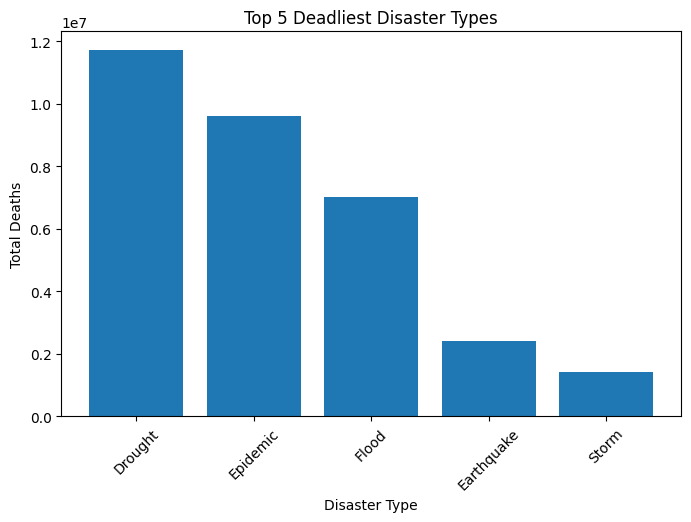

In [12]:
def top_deadliest_disasters(N=5):
    """
    死亡者数が多い順に上位N件を可視化
    """
    data = df.groupby("Disaster Type")["Total Deaths"].sum().sort_values(ascending=False)
    top_data = data.head(N)

    plt.figure(figsize=(8,5))
    plt.bar(top_data.index, top_data.values)
    plt.title(f"Top {N} Deadliest Disaster Types")
    plt.xlabel("Disaster Type")
    plt.ylabel("Total Deaths")
    plt.xticks(rotation=45)
    plt.show()

# 例
top_deadliest_disasters(5)


このグラフは、災害タイプごとの死亡者数を集計し、上位5つを棒グラフで示したものです。棒の高さによって致命性の高い災害がひと目で分かり、どの災害が最も多くの死者を出しているかを簡潔に把握できます。

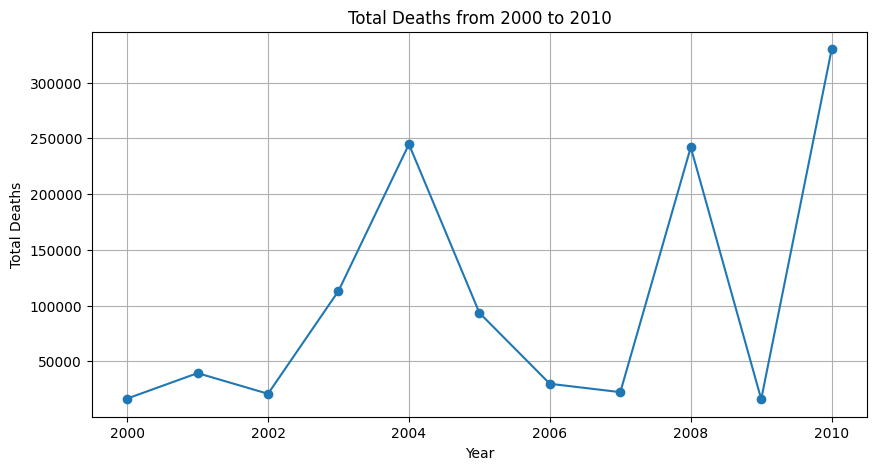

In [13]:
def visualize_year_range(start_year, end_year):
    """
    指定した年範囲の死亡者数を年ごとに可視化
    """
    data = df[(df["Year"] >= start_year) & (df["Year"] <= end_year)]

    # 年ごとの合計
    year_deaths = {}
    for year in range(start_year, end_year + 1):
        year_deaths[year] = data[data["Year"] == year]["Total Deaths"].sum()

    plt.figure(figsize=(10,5))
    plt.plot(list(year_deaths.keys()), list(year_deaths.values()), marker="o")
    plt.title(f"Total Deaths from {start_year} to {end_year}")
    plt.xlabel("Year")
    plt.ylabel("Total Deaths")
    plt.grid(True)
    plt.show()

# 例
visualize_year_range(2000, 2010)


この折れ線グラフは、指定した年範囲（2000〜2010年）における年間の死亡者数を示しています。年ごとの変化が視覚的に分かり、どの年に災害の影響が大きかったかを簡単に把握できます。

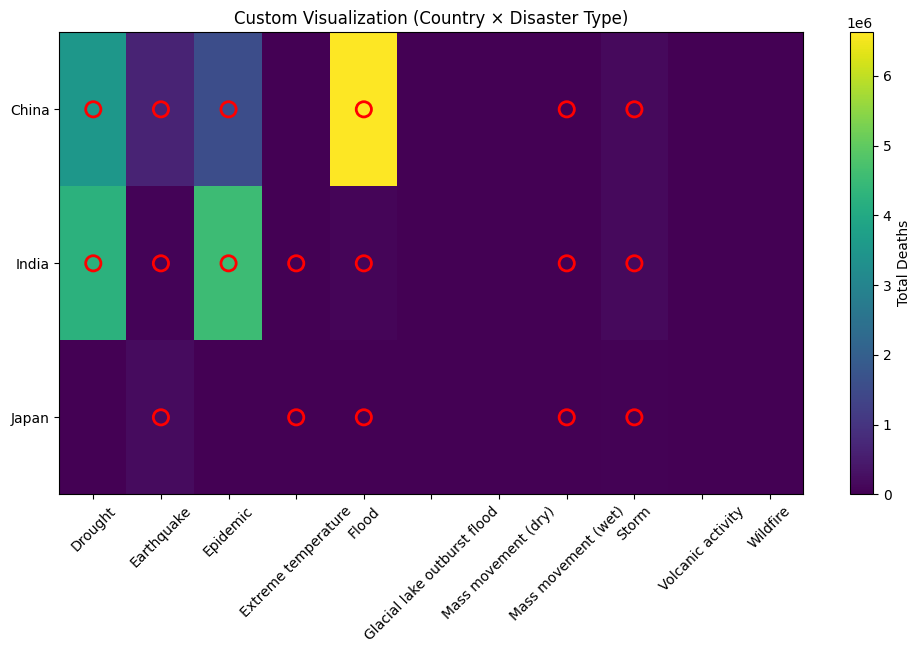

In [14]:
def custom_visualization(countries, threshold=1000):
    """
    オリジナル可視化：
    - 指定した複数国 × 災害タイプ
    - 死亡者数1000以上を赤色で強調
    """
    subset = df[df["Country"].isin(countries)]

    # 集計（国×災害タイプ）
    pivot = subset.pivot_table(values="Total Deaths",
                               index="Country",
                               columns="Disaster Type",
                               aggfunc="sum",
                               fill_value=0)

    plt.figure(figsize=(12,6))
    plt.imshow(pivot, aspect="auto")
    plt.colorbar(label="Total Deaths")

    plt.xticks(range(len(pivot.columns)), pivot.columns, rotation=45)
    plt.yticks(range(len(pivot.index)), pivot.index)
    plt.title("Custom Visualization (Country × Disaster Type)")

    # 1000以上を赤い丸で強調
    for i, country in enumerate(pivot.index):
        for j, d_type in enumerate(pivot.columns):
            if pivot.loc[country, d_type] >= threshold:
                plt.scatter(j, i, s=120, facecolors="none", edgecolors="red", linewidths=2)

    plt.show()

# 例
custom_visualization(["Japan", "China", "India"], threshold=1000)


このグラフは、複数の国と災害タイプの組み合わせごとに死亡者数を色で表したヒートマップです。
さらに、死亡者数が1000人以上の箇所には赤い丸が表示され, 特に被害が大きかった国×災害タイプを一目で確認できます。

## まとめ
**EMDATデータを用いて、国別・災害タイプ別の死亡者数を関数とループで可視化した。国同士の比較、致命的な災害の抽出、年範囲の分析を通じて災害の特徴を理解した。さらにカスタム可視化では閾値以上の災害を強調し、より応用的な分析を行った。**